First, watch this:

http://vimeo.com/59324550

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
%matplotlib inline

### About our data

We are using a daily weather sample for 1 year from RDU Airport (2014).  For more information on how this dataset is structured please see the [documentation](GHCND_documentation.pdf).

# Loading data

First let's call the `head` terminal command to see what the first few lines of our dataset looks like.

In [105]:
!head rdu-daily-2014.csv

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140101,0,0,0,106,-16,11,200,210,40,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140102,84,0,-9999,94,28,12,310,320,58,98,-9999,1,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140103,0,0,0,61,-55,33,300,310,98,143,-9999,-9999,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140104,0,0,0,33,-71,10,120,120,36,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140105,0,0,0,167,28,22,180,180,72,94,-9999,-9999,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140106,33,0,0,161,-88,61,220,210,134,174,-9999,1,-9999,-9999,-9999,-9999,-9999
GHCND:USW00013722,RALEIGH DURHAM IN

Alternatively (and ideally) we will load our CSV data into python using `pandas`.  One way we can load the data is directly from a csv file on our hard drive with the `read_csv` function.

In [106]:
rdu_weather = pd.read_csv("rdu-daily-2014.csv")
rdu_weather.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
0,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140101,0,0,0,106,-16,11,200,210,40,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140102,84,0,-9999,94,28,12,310,320,58,98,-9999,1,-9999,-9999,-9999,-9999,-9999
2,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140103,0,0,0,61,-55,33,300,310,98,143,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140104,0,0,0,33,-71,10,120,120,36,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,20140105,0,0,0,167,28,22,180,180,72,94,-9999,-9999,-9999,-9999,-9999,-9999,-9999


The variable `rdu_weather` now contains a `pandas DataFrame` which we can do many things to.  First lets get some more information about our dataframe.

In [107]:
rdu_weather.describe()

,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365,365.000000,365,365.000000,365.000000,365.000000,365.000000
mean,20140668.323288,38.471233,0.328767,-136.569863,212.364384,94.745205,24.865753,166.794521,117.758904,69.273973,41.882192,-9999,-6574.342466,-9999,-9615.438356,-9971.602740,-9670.232877,-9642.835616
std,345.475464,112.441205,3.127575,1163.903702,93.062258,92.427359,12.123044,94.939969,758.093489,24.267092,747.105366,0,4751.858538,0,1923.182294,523.423923,1785.586327,1855.862874
min,20140101.000000,0.000000,0.000000,-9999.000000,-38.000000,-138.000000,3.000000,10.000000,-9999.000000,27.000000,-9999.000000,-9999,-9999.000000,-9999,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,20140402.000000,0.000000,0.000000,0.000000,144.000000,17.000000,15.000000,70.000000,80.000000,54.000000,72.000000,-9999,-9999.000000,-9999,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,20140702.000000,0.000000,0.000000,0.000000,228.000000,100.000000,24.000000,210.000000,200.000000,67.000000,94.000000,-9999,-9999.000000,-9999,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,20141001.000000,15.000000,0.000000,0.000000,289.000000,183.000000,32.000000,230.000000,240.000000,81.000000,112.000000,-9999,1.000000,-9999,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,20141231.000000,1069.000000,30.000000,84.000000,367.000000,244.000000,68.000000,360.000000,360.000000,268.000000,385.000000,-9999,1.000000,-9999,1.000000,1.000000,1.000000,1.000000


# Indexing by date

One thing you will find yourself doing quite often is resampling your dataset based on timestamps. This can be important for getting less or more specific breakdowns of information depending on what you're trying to accomplish. However pandas requires us to convert our timestamps to an index manually.

##### Why Convert Manually?
As we've seen in python already - datetime stamps can come in many shapes and sizes, it is because of this that we have to use a `strftime` formatted string to allow pandas to correctly parse our timestamp into a python datetime object.

Lets take a look at the `DATE` column (Series) and see what it currently contains.

In [108]:
rdu_weather['DATE'].head()

0    20140101
1    20140102
2    20140103
3    20140104
4    20140105
Name: DATE, dtype: int64

Next up lets remove the `DATE` series and reapply it to our DataFrame as an index.

##### Why remove the DATE series?
The reason we want to convert our date series to an index containing datetime is to easily resample the data.  We will not get this benefit from the `DATE` column as it is - so we remove it from the original DataFrame as it will simply be duplicated data once the converted version of itself is applied to the index.

In [109]:
date_series = rdu_weather.pop('DATE')
rdu_weather.index = pd.to_datetime(date_series, format="%Y%m%d") #strftime

In [110]:
rdu_weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
DATE,,,,,,,,,,,,,,,,,,,
2014-01-01,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,106,-16,11,200,210,40,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2014-01-02,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,84,0,-9999,94,28,12,310,320,58,98,-9999,1,-9999,-9999,-9999,-9999,-9999
2014-01-03,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,61,-55,33,300,310,98,143,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2014-01-04,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,33,-71,10,120,120,36,58,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2014-01-05,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,167,28,22,180,180,72,94,-9999,-9999,-9999,-9999,-9999,-9999,-9999


# Cleaning up data

Cleaning up datasets will account for 90% of your time as a data scientist.  In our case the creator of this dataset has decided that missing or irrelevant data will be represented as an integer of `-9999`.  This makes sense why they chose the number as it wouldn't logically represent any valid measurement releating to an airport weather station.  And besides - the instrument recording the data probably was required to record some sort of data for every field... so this is how they hacked their way around it.

##### .replace()
For our purposes the best thing to replace missing/irrelevant data with is `NaN` (not a number).  `numpy` gives us a `NaN` value we can use - however in Python 3.5 a new constant `math.nan` was added. So use that if you prefer.

Lets replace the first few rows to make sure it worked.

In [111]:
rdu_weather.replace(-9999, np.nan)[0:4]

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
DATE,,,,,,,,,,,,,,,,,,,
2014-01-01,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,106,-16,11,200,210,40,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,84,0,NaN,94,28,12,310,320,58,98,NaN,1,NaN,NaN,NaN,NaN,NaN
2014-01-03,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,61,-55,33,300,310,98,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,33,-71,10,120,120,36,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well it worked but the DataFrame is left unchanged - that's because the `.replace()` function returns a new DataFrame with the values changed. For our purposes we can reassign the `rdu_weather` variable to the return value of `.replace()`.

In [112]:
rdu_weather = rdu_weather.replace(-9999, np.nan)

In [113]:
rdu_weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,PGTM,WT01,WT06,WT02,WT04,WT08,WT03
DATE,,,,,,,,,,,,,,,,,,,
2014-01-01,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,106,-16,11,200,210,40,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,84,0,NaN,94,28,12,310,320,58,98,NaN,1,NaN,NaN,NaN,NaN,NaN
2014-01-03,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,61,-55,33,300,310,98,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,33,-71,10,120,120,36,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,GHCND:USW00013722,RALEIGH DURHAM INTERNATIONAL AIRPORT NC US,0,0,0,167,28,22,180,180,72,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can continue with this method of changing our DataFrame.  We can specifically ask for a new DataFrame only containing specific columns.

##### Warning!
This is a pretty destructive act.  Given the statefulness of an ipython notebook, do not expect a complicated notebook to work as you'd expect if you make a habit out of redefining a DataFrame as a changed version of itself.

In [114]:
rdu_weather = rdu_weather[['TMAX', 'TMIN', 'AWND', 'PRCP', 'SNOW']]
rdu_weather.columns

Index(['TMAX', 'TMIN', 'AWND', 'PRCP', 'SNOW'], dtype='object')

In [115]:
rdu_weather.head()

,TMAX,TMIN,AWND,PRCP,SNOW
DATE,,,,,
2014-01-01,106,-16,11,0,0
2014-01-02,94,28,12,84,NaN
2014-01-03,61,-55,33,0,0
2014-01-04,33,-71,10,0,0
2014-01-05,167,28,22,0,0


#### Unit Conversion

In our situation our temperatures are in Celsius. While that wouldn't pose a problem for most of the world, it can be confusing for Americans. So we can write a function that accepts a series as a parameter and returns a converted version of that series.

With this function we can remove a series from the DataFrame, pass it to the function, and get back the new converted series.  Finally we can assign the series back onto the DataFrame with a new column name.

In [116]:
def to_fahrenheit(temps):
    return (temps / 10 * (9 / 5) + 32).round(1)

In [117]:
rdu_weather["temp_max"] = to_fahrenheit(rdu_weather.pop('TMAX'))
rdu_weather['temp_min'] = to_fahrenheit(rdu_weather.pop('TMIN'))

In [118]:
rdu_weather.head()

,AWND,PRCP,SNOW,temp_max,temp_min
DATE,,,,,
2014-01-01,11,0,0,51.1,29.1
2014-01-02,12,84,NaN,48.9,37.0
2014-01-03,33,0,0,43.0,22.1
2014-01-04,10,0,0,37.9,19.2
2014-01-05,22,0,0,62.1,37.0


##### In-place conversion
The above method is not the only way to convert all values in an entire series. You can just perform math on a series after we've popped it out of the DataFrame and re-apply it back to the DataFrame.

 - Wind speed is in 10ths of meters per second.
 - Precipitation is in 10ths of millimeters.
 - Snowfall is in millimeters - which is okay, so let's just rename it.

In [119]:
rdu_weather["wind_speed"] = rdu_weather.pop("AWND") / 10
rdu_weather["precipitation"] = rdu_weather.pop("PRCP") / 10
rdu_weather = rdu_weather.rename(columns={"SNOW": "snowfall"})

In [120]:
rdu_weather.head()

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-01-01,0,51.1,29.1,1.1,0.0
2014-01-02,NaN,48.9,37.0,1.2,8.4
2014-01-03,0,43.0,22.1,3.3,0.0
2014-01-04,0,37.9,19.2,1.0,0.0
2014-01-05,0,62.1,37.0,2.2,0.0


## Remove NaNs

One easy way to see if there are NaNs in a Series is to get the unique values in our Series and NaN will show up as one.

In [121]:
rdu_weather.snowfall.unique()

array([  0.,  nan,  13.,  30.,   5.,  84.,  10.])

In [122]:
rdu_weather.wind_speed.unique()

array([ 1.1,  1.2,  3.3,  1. ,  2.2,  6.1,  3.4,  1.3,  1.6,  4.6,  2.6,
        3.2,  2. ,  1.7,  4.1,  3. ,  3.8,  3.6,  2.1,  2.8,  6.8,  4.3,
        3.7,  1.8,  0.8,  0.9,  1.4,  4.9,  4. ,  2.9,  5.1,  2.3,  1.5,
        6. ,  1.9,  2.4,  5.8,  3.1,  2.5,  4.7,  5.2,  2.7,  5. ,  4.8,
        3.5,  5.5,  3.9,  4.4,  5.3,  0.6,  0.5,  0.4,  4.2,  0.7,  0.3,
        5.9])

In [123]:
rdu_weather.precipitation.unique()

array([   0. ,    8.4,    3.3,   14.5,    7.1,    7.6,    1.8,    2.5,
          4.6,   12.2,    1.5,    2. ,   16.3,    9.9,    6.9,   12.7,
         10.2,    9.1,   14. ,   43.7,    8.9,    7.4,   11.7,    2.3,
          1. ,    3.6,    0.8,    7.9,   12.4,    5.8,   36.1,    0.3,
         33.5,   14.2,   11.9,    1.3,   28.4,   85.9,    5.6,    0.5,
         14.7,   10.7,   22.4,   16.8,  106.9,   23.6,   29.5,   36.8,
         11.4,   18. ,   25.7,   62.2,   15.5,   26.9,   30. ,   26.4,
          3. ,    3.8,   80.8,   16. ,   15.7,    5.3,   10.9,   42.9,
          4.1,    8.1,   22.9,   43.4,   18.3])

In [124]:
rdu_weather.head()

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-01-01,0,51.1,29.1,1.1,0.0
2014-01-02,NaN,48.9,37.0,1.2,8.4
2014-01-03,0,43.0,22.1,3.3,0.0
2014-01-04,0,37.9,19.2,1.0,0.0
2014-01-05,0,62.1,37.0,2.2,0.0


# Querying data

What good is a DataFrame if you can't easily find data within it?  One really cool way to retrieve filtered data from a DataFrame is with a method called `Boolean Indexing`.  This method is best described as passing an expression that evaluates to `True` or `False` into the square bracket lookup.

For example, if you'd like to see days that only contained snowfall values you could do the following:

In [125]:
rdu_weather[rdu_weather.snowfall > 0]

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-01-21,13,51.1,26.2,2.2,2.5
2014-01-28,30,33.1,18.1,3.7,4.6
2014-01-29,5,27.1,14.2,1.8,0.0
2014-02-12,84,30.2,23.2,4.9,16.3
2014-02-13,10,36.0,30.2,3.0,9.9
2014-03-03,5,61.0,20.1,4.9,9.1


let's sort the days descending

In [126]:
rdu_weather[rdu_weather.snowfall > 0].sort("snowfall", ascending=False)

/Users/taddeimania/Developer/class-notes/Notebooks/week-4/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-02-12,84,30.2,23.2,4.9,16.3
2014-01-28,30,33.1,18.1,3.7,4.6
2014-01-21,13,51.1,26.2,2.2,2.5
2014-02-13,10,36.0,30.2,3.0,9.9
2014-01-29,5,27.1,14.2,1.8,0.0
2014-03-03,5,61.0,20.1,4.9,9.1


In [127]:
rdu_weather.snowfall.head()

DATE
2014-01-01     0
2014-01-02   NaN
2014-01-03     0
2014-01-04     0
2014-01-05     0
Name: snowfall, dtype: float64

You can get an idea for how `Boolean Indexing` works behind the scenes by just calling it by itself (not inside of a square bracket lookup).

You will see that every row in the series that resolves to True would be what is returned from our previous query.

In [128]:
rdu_weather.snowfall > 0

DATE
2014-01-01    False
2014-01-02    False
2014-01-03    False
2014-01-04    False
2014-01-05    False
2014-01-06    False
2014-01-07    False
2014-01-08    False
2014-01-09    False
2014-01-10    False
2014-01-11    False
2014-01-12    False
2014-01-13    False
2014-01-14    False
2014-01-15    False
2014-01-16    False
2014-01-17    False
2014-01-18    False
2014-01-19    False
2014-01-20    False
2014-01-21     True
2014-01-22    False
2014-01-23    False
2014-01-24    False
2014-01-25    False
2014-01-26    False
2014-01-27    False
2014-01-28     True
2014-01-29     True
2014-01-30    False
              ...  
2014-12-02    False
2014-12-03    False
2014-12-04    False
2014-12-05    False
2014-12-06    False
2014-12-07    False
2014-12-08    False
2014-12-09    False
2014-12-10    False
2014-12-11    False
2014-12-12    False
2014-12-13    False
2014-12-14    False
2014-12-15    False
2014-12-16    False
2014-12-17    False
2014-12-18    False
2014-12-19    False
2014-12-20    F

You can query pretty much any numerical value for a series that contains only numbers.

In [129]:
rdu_weather[rdu_weather.temp_max > 90]

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-05-13,0,91.9,66.9,2.6,0.0
2014-06-04,0,91.9,64.9,2.1,0.5
2014-06-05,0,91.0,72.0,3.4,0.0
2014-06-10,0,93.9,68.0,1.5,0.0
2014-06-11,0,93.9,68.0,2.1,14.7
2014-06-16,0,95.0,69.1,1.9,2.0
2014-06-17,0,96.1,70.0,3.2,0.0
2014-06-18,0,97.0,70.0,3.3,0.0
2014-06-19,0,97.0,70.0,2.7,6.9


### Hottest Days

In [130]:
rdu_weather.temp_max.max()

98.099999999999994

In [131]:
rdu_weather[rdu_weather.temp_max == rdu_weather.temp_max.max()]

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-07-08,0,98.1,73.9,5.3,0
2014-07-14,0,98.1,75.0,4.3,0


### Coldest Days

In [132]:
rdu_weather.temp_min.min()

7.2000000000000002

In [133]:
rdu_weather[rdu_weather.temp_min == rdu_weather.temp_min.min()]

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-01-30,0,37.9,7.2,0.8,0


### Wettest Days

In [134]:
rdu_weather[rdu_weather.precipitation == rdu_weather.precipitation.max()]

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-07-15,0,93.9,70,3.4,106.9


### First 5 days temperature (F)

In [135]:
rdu_weather["temp_max"].head()

DATE
2014-01-01    51.1
2014-01-02    48.9
2014-01-03    43.0
2014-01-04    37.9
2014-01-05    62.1
Name: temp_max, dtype: float64

### 99th - 103rd row temperatures (F)

In [136]:
rdu_weather[100:104]["temp_max"]

DATE
2014-04-11    78.1
2014-04-12    81.0
2014-04-13    81.0
2014-04-14    75.9
Name: temp_max, dtype: float64

In [137]:
rdu_weather["temp_max"][100:104]

DATE
2014-04-11    78.1
2014-04-12    81.0
2014-04-13    81.0
2014-04-14    75.9
Name: temp_max, dtype: float64

# Time series manipulation

#### .resample()

When you want to look at your data in a different way based on a different timeframe you are going to want to "resample" your DataFrame.  The two arguments you will want to provide your resample function call are:

 - Rule ("Time Aggregate")
 - How
 
The Rule allows you to define the output detail. (Things like "monthly", "weekly", "hourly")  Keep in mind, if you are asking for a higher resolution of data than you have provided then it will fill rows with NaN - in much the same way you can't scale up an image and not lose quality.

The How allows you to define what you want to learn from the resampled data.  These are functions you can apply to the subsets. In our case we want to see the `sum` and the `average` amount of precipitation every month.

In [138]:
rdu_weather.precipitation.resample('M', how=["sum", "mean"]).sort_values(by="sum", ascending=False)

,sum,mean
DATE,,
2014-07-31,227.5,7.338710
2014-08-31,174.5,5.629032
2014-09-30,150.4,5.013333
2014-04-30,132.9,4.430000
2014-03-31,128.6,4.148387
2014-12-31,126.4,4.077419
2014-05-31,102.2,3.296774
2014-11-30,96.0,3.200000
2014-06-30,84.2,2.806667


Max Temperature Mean, Median, and Standard Deviation

In [139]:
rdu_weather.temp_max.resample('M', how=["mean", "median", "std"])

,mean,median,std
DATE,,,
2014-01-31,48.145161,51.10,12.088034
2014-02-28,53.475000,53.10,11.634611
2014-03-31,57.906452,60.10,13.182133
2014-04-30,72.343333,72.50,8.687751
2014-05-31,81.396774,82.00,7.000594
2014-06-30,88.813333,88.55,4.774626
2014-07-31,88.096774,88.00,5.708560
2014-08-31,84.641935,86.00,5.362013
2014-09-30,79.940000,79.55,8.348058


If you only provide a "Rule" to a resample performed on a DataFrame then it will only show the row representing the closest match to how you've defined the rule. "M" is the end of the month.

In [140]:
rdu_weather.resample("M")

,snowfall,temp_max,temp_min,wind_speed,precipitation
DATE,,,,,
2014-01-31,1.600000,48.145161,25.341935,2.690323,1.606452
2014-02-28,3.615385,53.475000,33.460714,2.664286,2.725000
2014-03-31,0.161290,57.906452,34.125806,3.196774,4.148387
2014-04-30,0.000000,72.343333,48.026667,3.326667,4.430000
2014-05-31,0.000000,81.396774,58.254839,2.551613,3.296774
2014-06-30,0.000000,88.813333,65.776667,2.213333,2.806667
2014-07-31,0.000000,88.096774,68.680645,2.487097,7.338710
2014-08-31,0.000000,84.641935,67.100000,1.835484,5.629032
2014-09-30,0.000000,79.940000,64.413333,2.240000,5.013333


This is how you'd resample weekly on `temp_max` for Mean / Median / Standard Deviation

In [141]:
rdu_weather.temp_max.resample('W', how=["mean", "median", "std"]).head()

,mean,median,std
DATE,,,
2014-01-05,48.600000,48.9,9.143850
2014-01-12,50.742857,54.0,14.430276
2014-01-19,53.714286,54.0,6.351753
2014-01-26,43.171429,39.9,13.163550
2014-02-02,48.442857,53.1,15.535321


So far we've mostly called `resample` on individual series, but if you call it on an entire DataFrame (in our case we'll narrow our focus to two Series) with a `Rule` and a `How` argument it will give you a multi level index grouping the columns together by the `How` argument.

In [142]:
rdu_weather[["temp_max", "temp_min"]].resample('W', how=["mean", "median", "std"]).head()

temp_max                     temp_min                  
                 mean median        std       mean median        std
DATE                                                                
2014-01-05  48.600000   48.9   9.143850  28.880000   29.1   8.239964
2014-01-12  50.742857   54.0  14.430276  26.971429   25.2  14.078200
2014-01-19  53.714286   54.0   6.351753  31.785714   32.0   3.477752
2014-01-26  43.171429   39.9  13.163550  20.285714   18.1   6.418574
2014-02-02  48.442857   53.1  15.535321  21.885714   18.1  11.757186

### Plotting

This type of resampling can be VERY useful when plotting your dataframes as frames with a ton of data can make for VERY noisy plots.

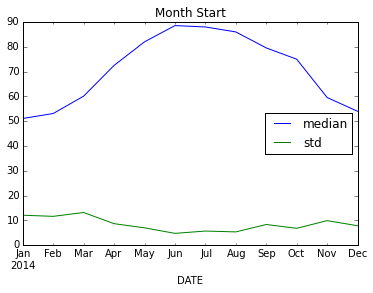

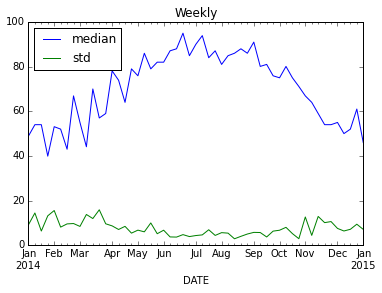

In [143]:
rdu_weather.temp_max.resample('MS', how=["median", "std"]).plot(title="Month Start")
rdu_weather.temp_max.resample('W', how=["median", "std"]).plot(title="Weekly")
plt.show()

In [144]:
rdu_weather[["temp_max", "temp_min"]].resample('MS')

,temp_max,temp_min
DATE,,
2014-01-01,48.145161,25.341935
2014-02-01,53.475000,33.460714
2014-03-01,57.906452,34.125806
2014-04-01,72.343333,48.026667
2014-05-01,81.396774,58.254839
2014-06-01,88.813333,65.776667
2014-07-01,88.096774,68.680645
2014-08-01,84.641935,67.100000
2014-09-01,79.940000,64.413333


In [102]:
rdu_weather[["temp_max", "temp_min"]]

<function pandas.tseries.index.date_range>

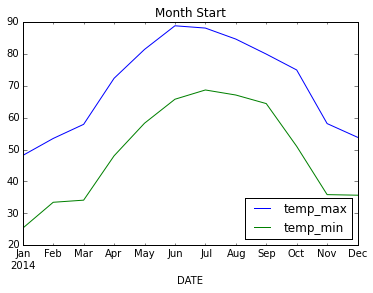

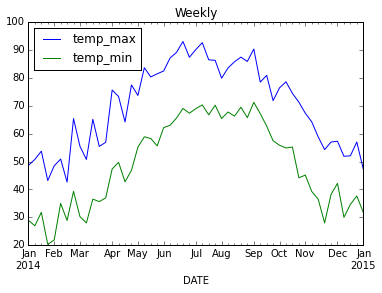

In [84]:
rdu_weather[["temp_max", "temp_min"]].resample('MS').plot(title="Month Start")
rdu_weather[["temp_max", "temp_min"]].resample('W').plot(title="Weekly")
plt.show()